# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website,they might browse the courses or fill up a form for the course or watch some videos. When these people fill up aform providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc.Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

# Step1:Reading and Understanding the data

In [1]:
#Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Numpy and Pandas
import numpy as np
import pandas as pd

In [3]:
#Importing the data and see the head of our dataset
lead=pd.read_csv('D:/dswf/ML/2. Logistic Regression/assignment/Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Let's check the dimensions of our dataframe
lead.shape

(9240, 37)

In [5]:
#Let's look at the sttistical aspects of our dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Let's see the type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
# To check the sum of missing values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Step2:Data Cleaning

In [8]:
# Convert Select to nan
lead=lead.replace('Select',np.nan)

In [9]:
#Adding up the missing values(Column wise)
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#Dropping the column which has 70% greater than the nan values 
lead=lead.drop('Lead Profile',1)


In [12]:
#Dropping the column which has 70% greater than the nan values 
lead=lead.drop('How did you hear about X Education',1)

In [13]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### let's replace the null values of each columns

In [14]:
lead['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

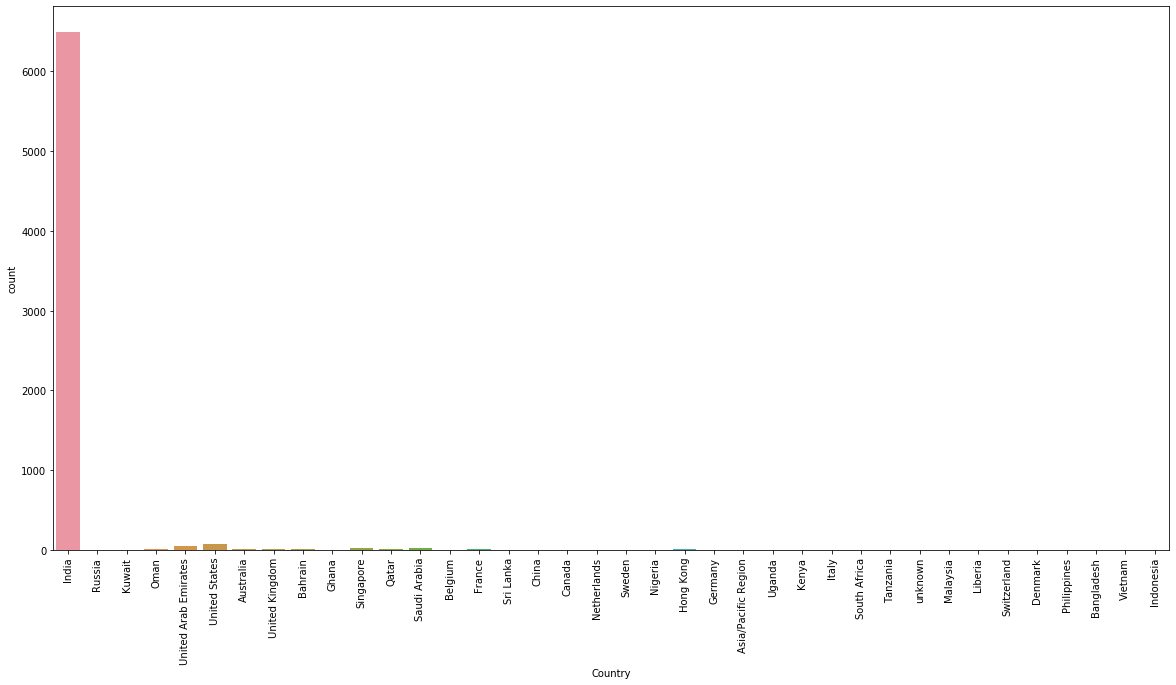

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(lead['Country'])
plt.xticks(rotation=90)

In [16]:
lead['Country']=lead['Country'].replace(np.nan,'India')

In [17]:
lead['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

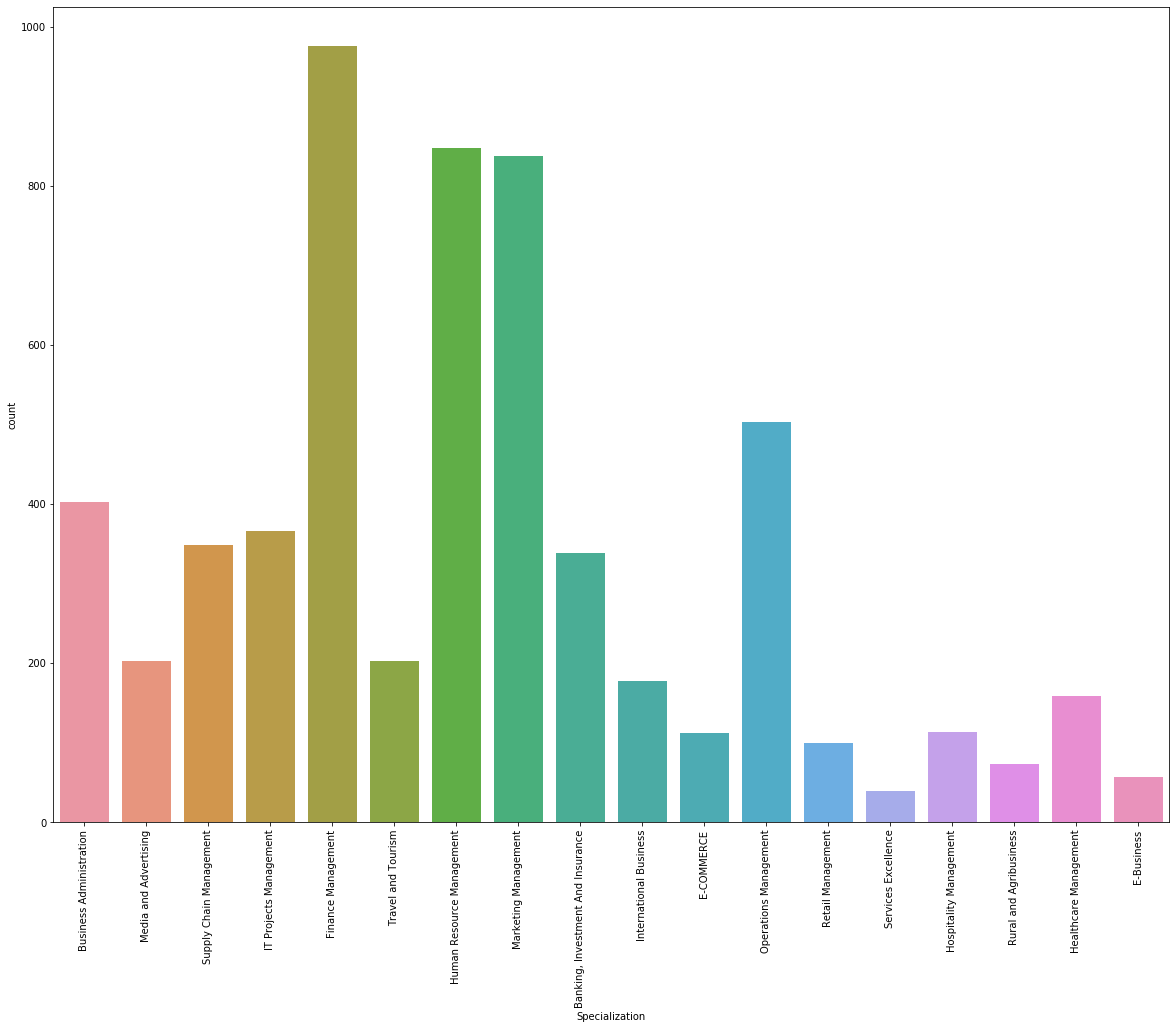

In [18]:
plt.figure(figsize=(20,15))
sns.countplot(lead['Specialization'])
plt.xticks(rotation=90)

In [19]:
lead['Specialization']=lead['Specialization'].replace(np.nan,'Others')

In [20]:
lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

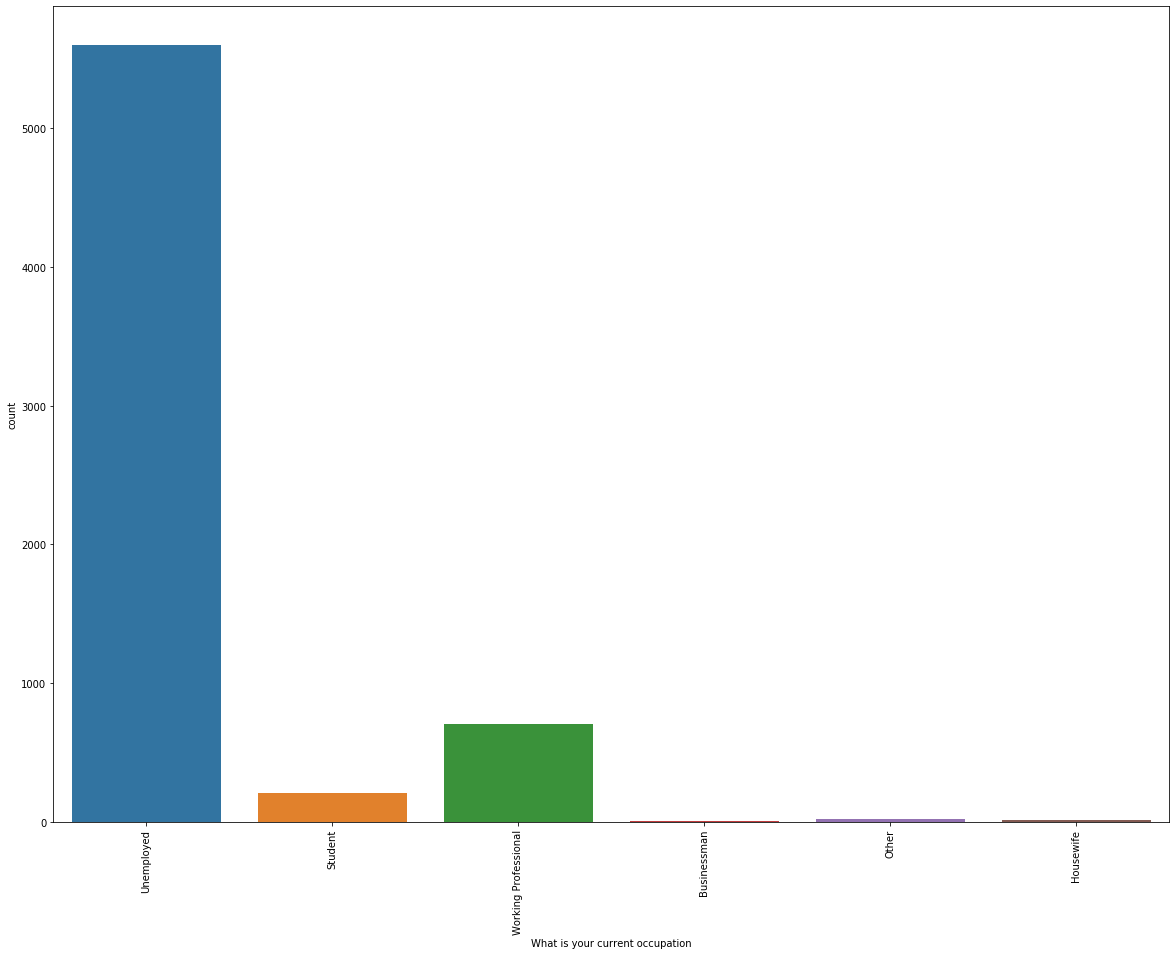

In [21]:
plt.figure(figsize=(20,15))
sns.countplot(lead['What is your current occupation'])
plt.xticks(rotation=90)

In [22]:
lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'Unemployed')

In [23]:
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

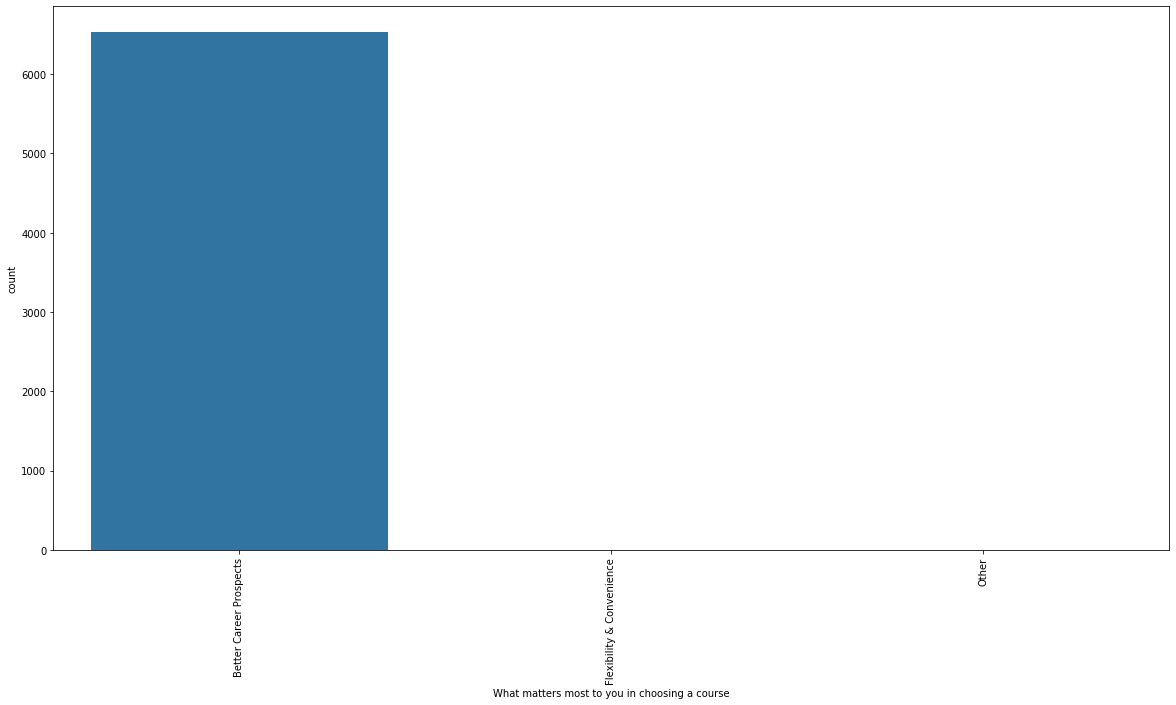

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(lead['What matters most to you in choosing a course'])
plt.xticks(rotation=90)

In [25]:
lead['What matters most to you in choosing a course']=lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [26]:
lead['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

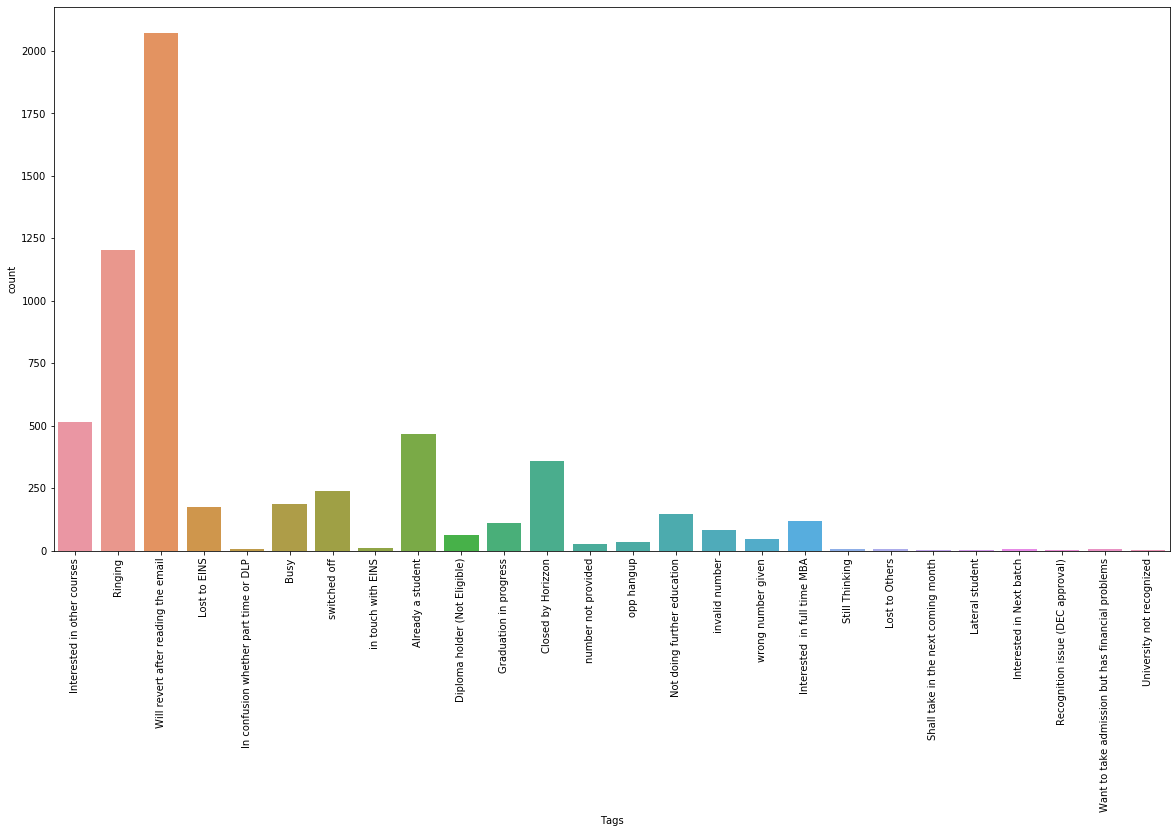

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(lead['Tags'])
plt.xticks(rotation=90)

In [28]:
lead['Tags']=lead['Tags'].replace(np.nan,'Will revert after reading the email')

In [29]:
lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

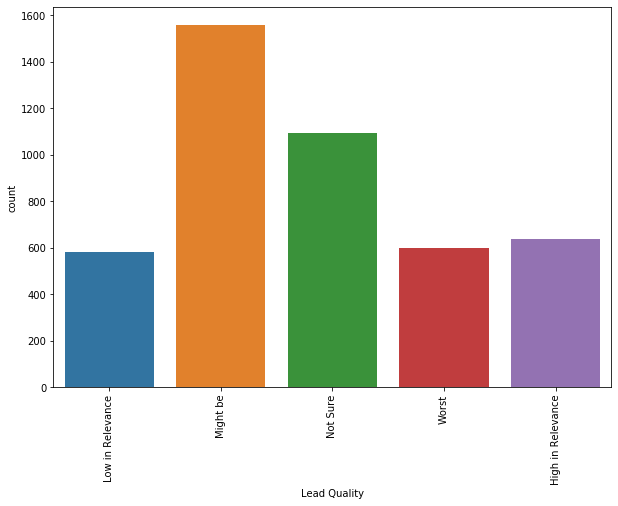

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(lead['Lead Quality'])
plt.xticks(rotation=90)

In [31]:
lead['Lead Quality']=lead['Lead Quality'].replace(np.nan,'Not Sure')

In [32]:
lead['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

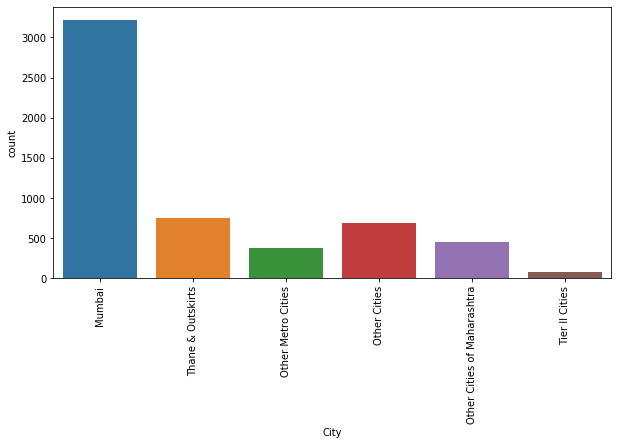

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(lead['City'])
plt.xticks(rotation=90)

In [34]:
lead['City']=lead['City'].replace(np.nan,'Mumbai')

In [35]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [36]:
lead['Asymmetrique Activity Index'].describe()

count          5022
unique            3
top       02.Medium
freq           3839
Name: Asymmetrique Activity Index, dtype: object

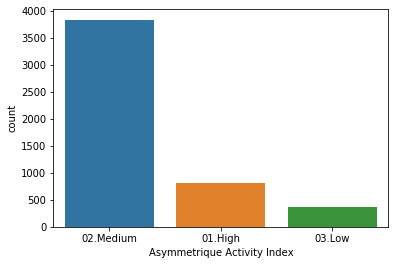

In [37]:
plt1=sns.countplot(lead['Asymmetrique Activity Index'])


In [38]:
lead['Asymmetrique Profile Index'].describe()

count          5022
unique            3
top       02.Medium
freq           2788
Name: Asymmetrique Profile Index, dtype: object

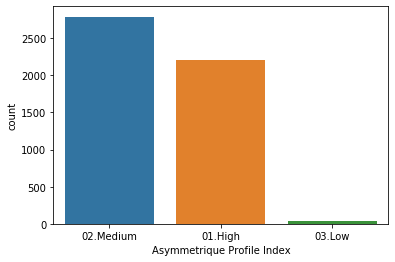

In [39]:
plt2=sns.countplot(lead['Asymmetrique Profile Index'])

In [40]:
lead['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

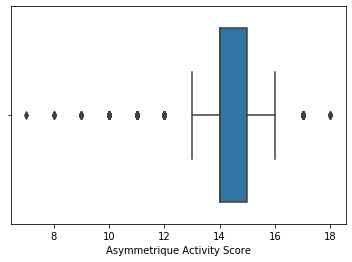

In [41]:
sns.boxplot(lead['Asymmetrique Activity Score'])

In [42]:
lead['Asymmetrique Profile Score'].describe()

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

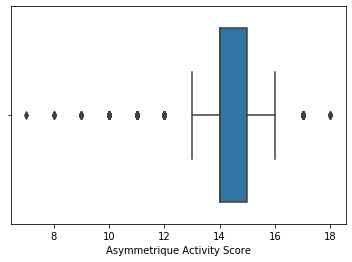

In [43]:
sns.boxplot(lead['Asymmetrique Activity Score'])

In [44]:
# dropping some columns
lead=lead.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],1)

In [45]:
# Checking the percentage of null values
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [46]:
lead.dropna(inplace=True)

In [47]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [48]:
lead.shape

(9074, 31)

# Step3:Analyzing the Data

In [49]:
# Checking the Converted percentage
Converted=(sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

#### Lead Origin

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

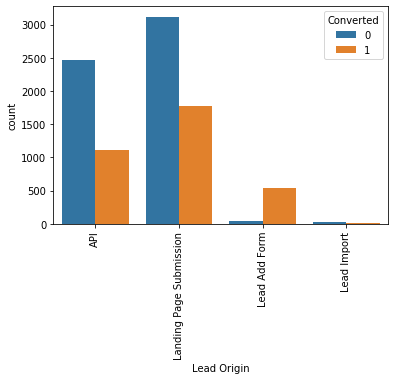

In [50]:
sns.countplot(x='Lead Origin',hue='Converted',data=lead)
plt.xticks(rotation=90)

#### Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

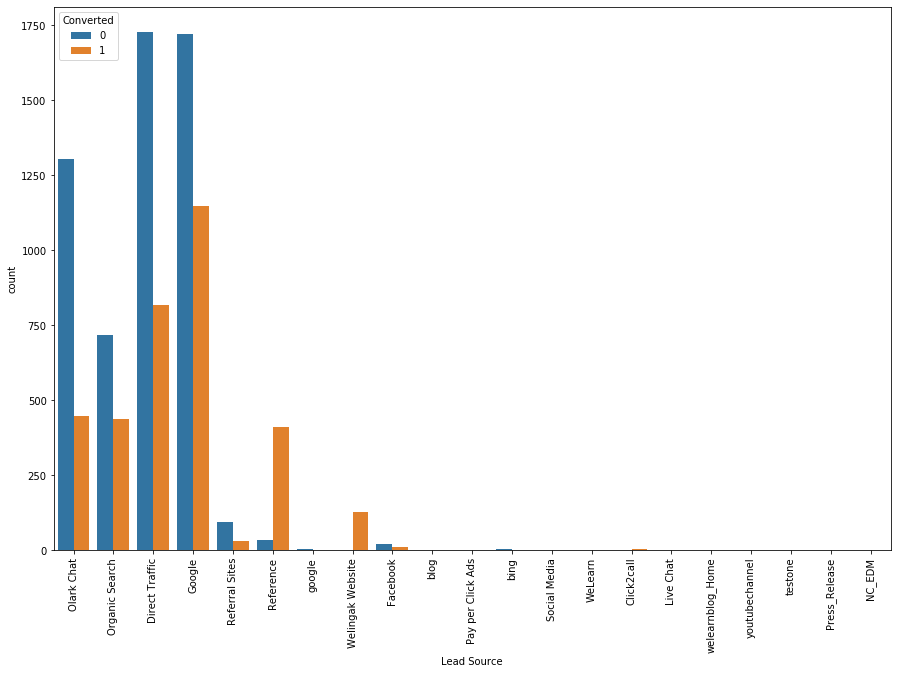

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(x='Lead Source',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [52]:
lead['Lead Source']=lead['Lead Source'].replace(['google'],'Google')
lead['Lead Source']=lead['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2cal','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'],'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

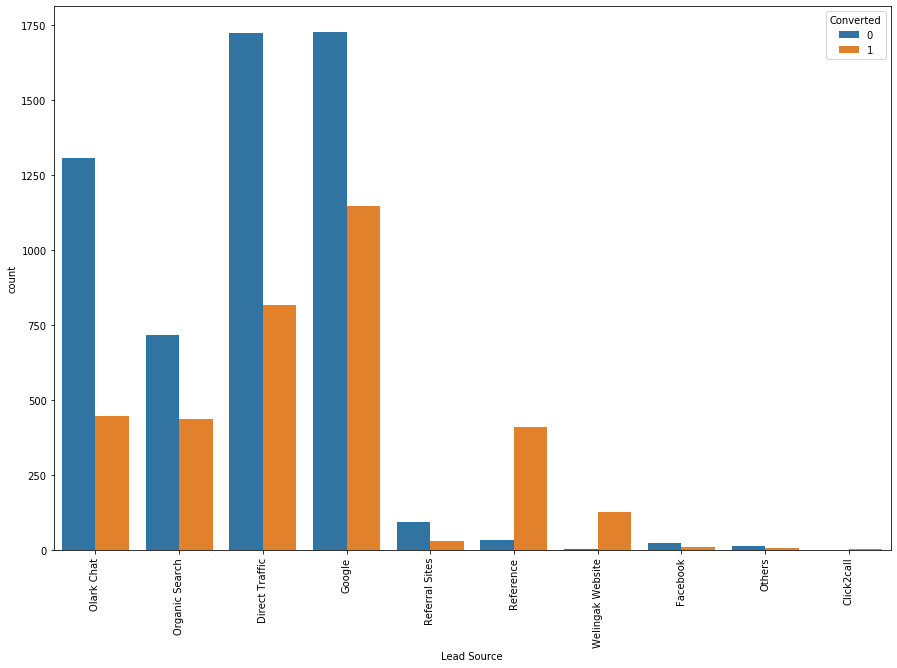

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(x='Lead Source',hue='Converted',data=lead)
plt.xticks(rotation=90)

#### Do Not Email

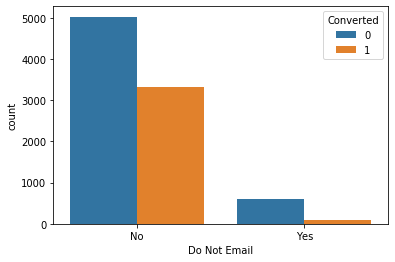

In [54]:
sns.countplot(x='Do Not Email',hue='Converted',data=lead)

#### Do Not Call

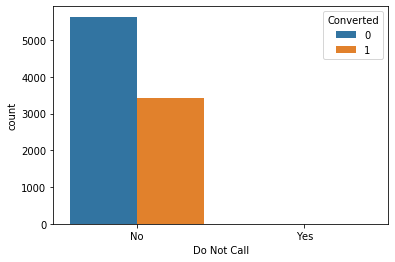

In [55]:
sns.countplot(x='Do Not Call',hue='Converted',data=lead)

#### TotalVisits

In [56]:
lead['TotalVisits'].describe(percentiles=(.05,.10,.25,.50,.75,.90,.95,.99))

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

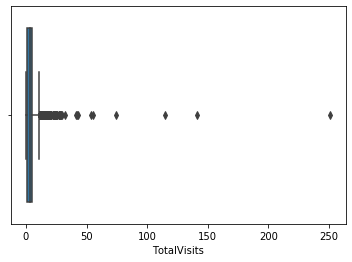

In [57]:
sns.boxplot(lead['TotalVisits'])

In [58]:
percentiles=lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits']<=percentiles[0]]=percentiles[0]
lead['TotalVisits'][lead['TotalVisits']>=percentiles[1]]=percentiles[1]

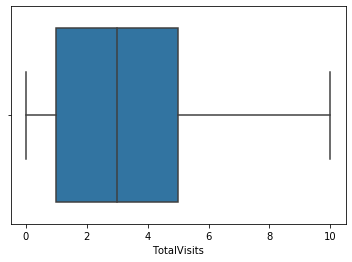

In [59]:
sns.boxplot(lead['TotalVisits'])

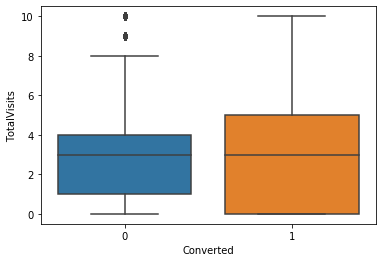

In [60]:
sns.boxplot(y='TotalVisits',x='Converted',data=lead)

#### Total Time spent on Website

In [61]:
lead['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

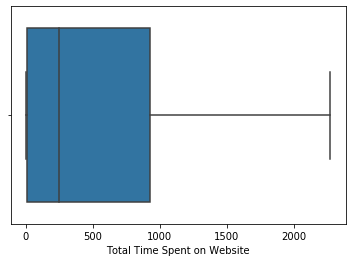

In [62]:
sns.boxplot(lead['Total Time Spent on Website'])

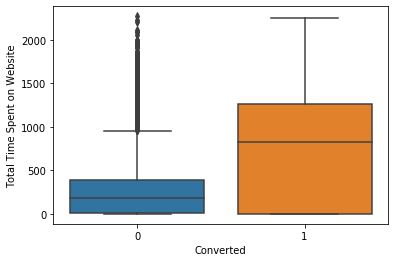

In [63]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=lead)

#### Page views per visit

In [64]:
lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

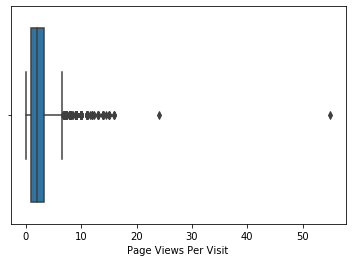

In [65]:
sns.boxplot(lead['Page Views Per Visit'])

In [66]:
percentiles=lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit']<=percentiles[0]]=percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit']>=percentiles[1]]=percentiles[1]

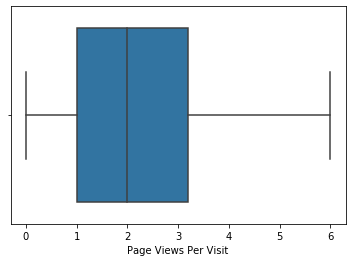

In [67]:
sns.boxplot(lead['Page Views Per Visit'])

#### Last Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

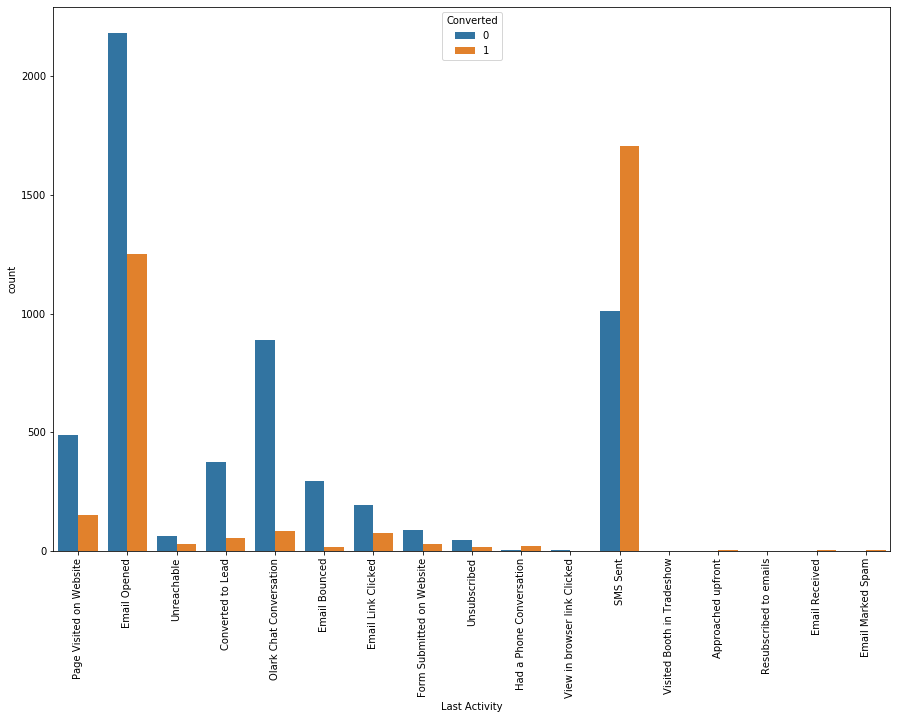

In [68]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [69]:
lead['Last Activity']=lead['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Other Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

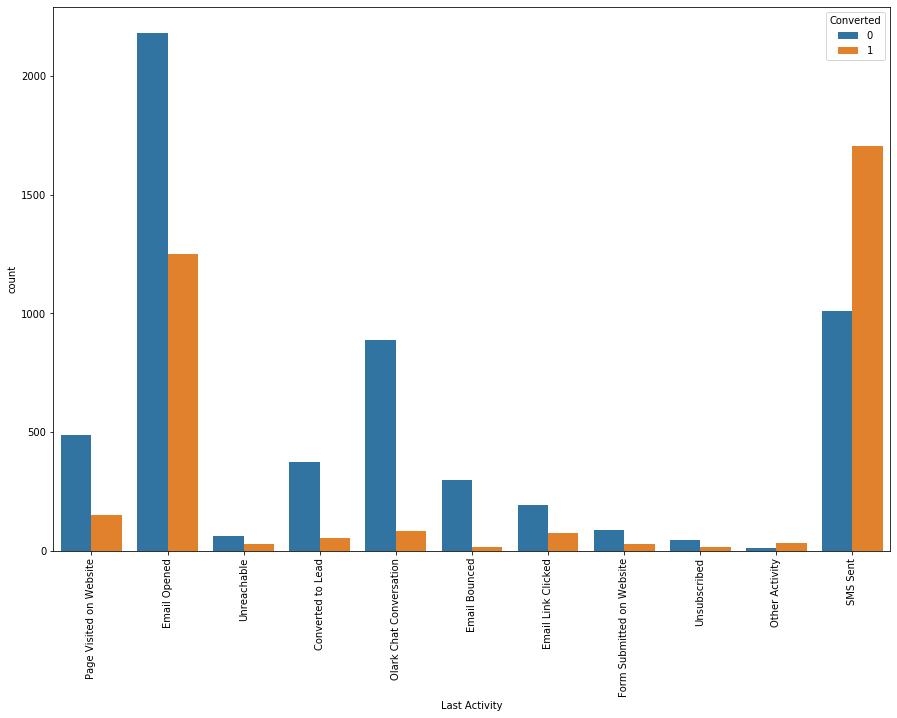

In [70]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

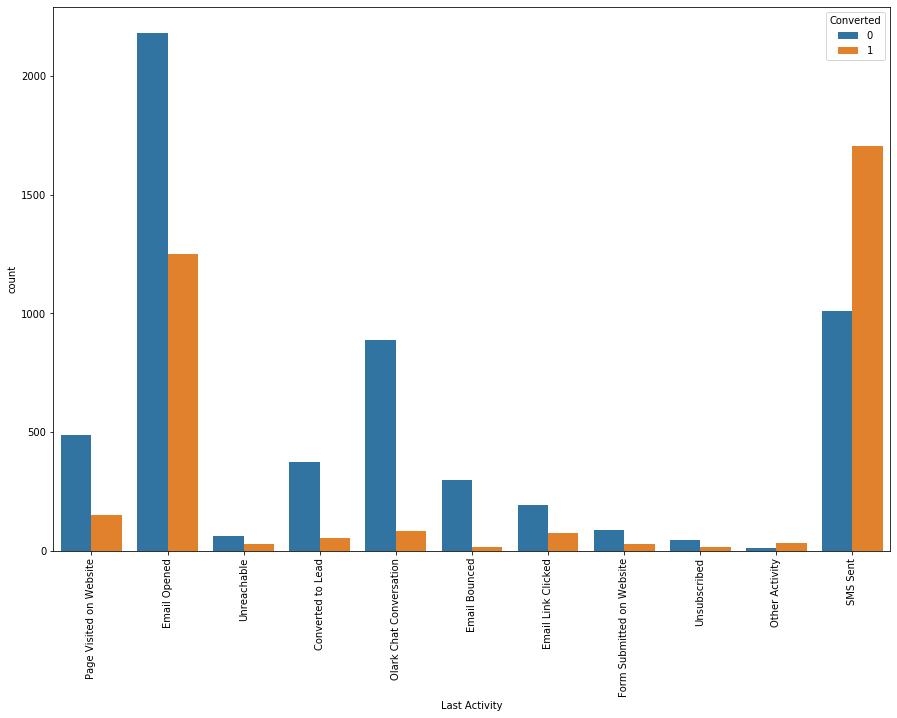

In [71]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

#### Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

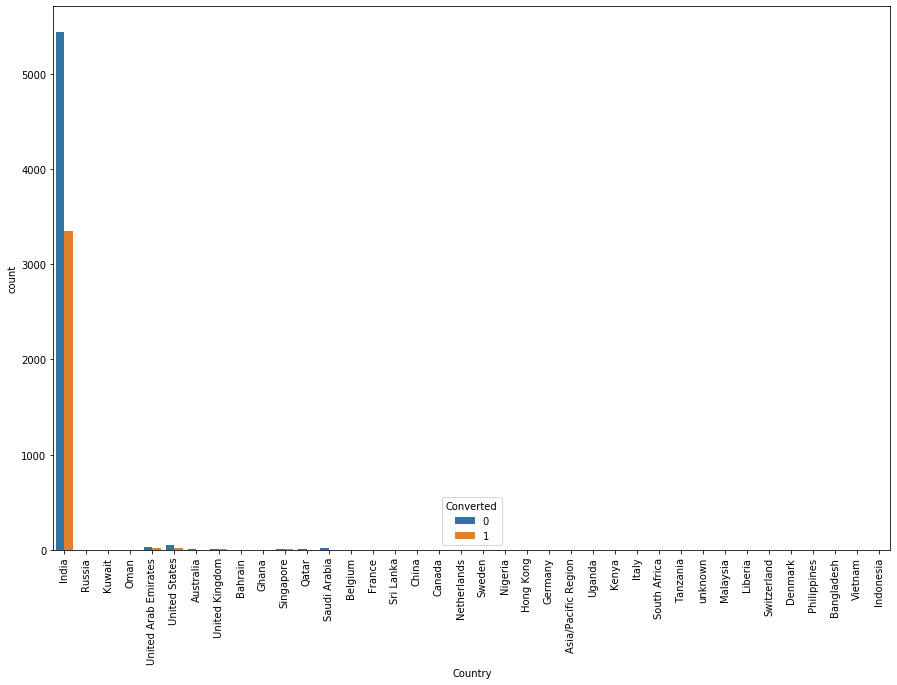

In [72]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [73]:
lead['Country']=lead['Country'].replace(['Russia','Kuwait','Oman','Bahrain','Ghana','Belgium','France','Sri Lanka','China','Canada','Netherlands','Sweden','Nigeria','Hong Kong','Germany','Asia/Pacific Region','Uganda','Kenya','Italy','South Africa','Tanzania','unknown','Malaysia','Liberia','Switzerland','Denmark','Philippines','Bangladesh','Vietnam','Indonesia'],'Other countries')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

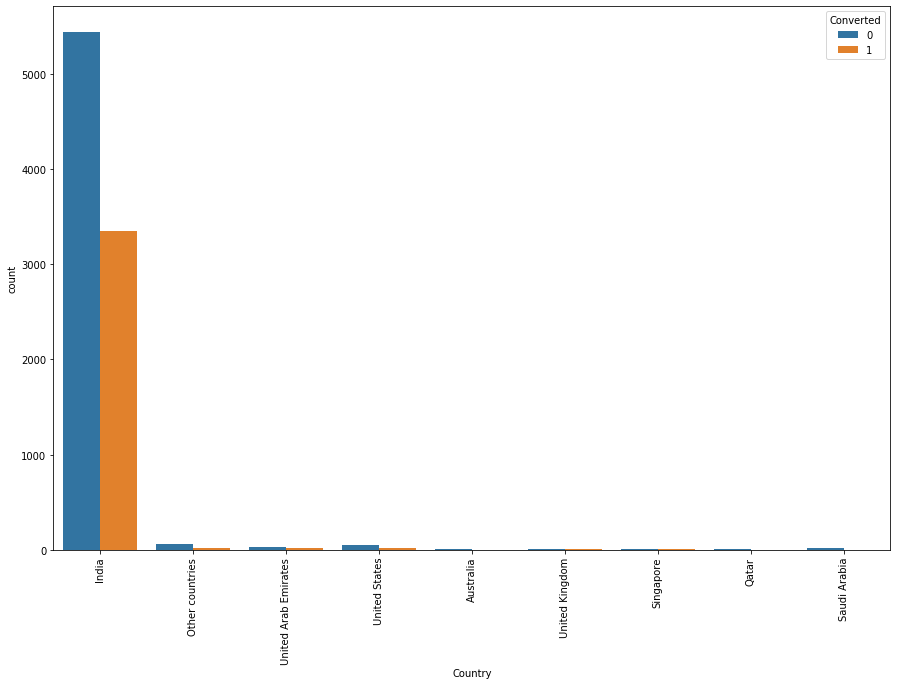

In [74]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country',hue='Converted',data=lead)
plt.xticks(rotation=90)

#### Specialization

In [75]:
lead['Specialization'].describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

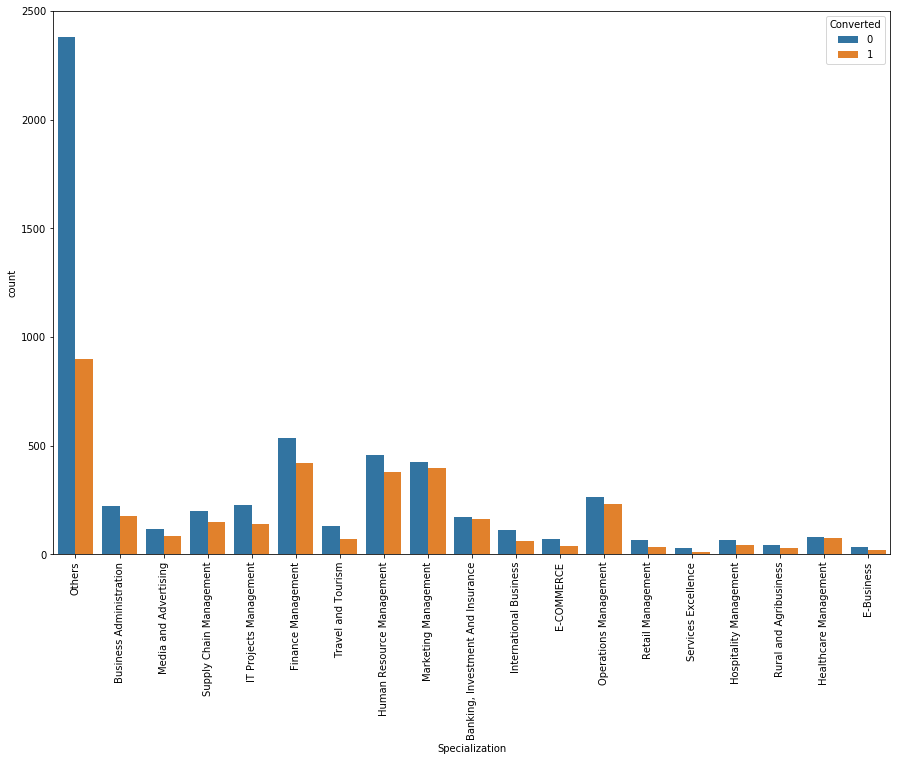

In [76]:
plt.figure(figsize=(15,10))
sns.countplot(x='Specialization',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [77]:
lead['Specialization']=lead['Specialization'].replace('Others','Other Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

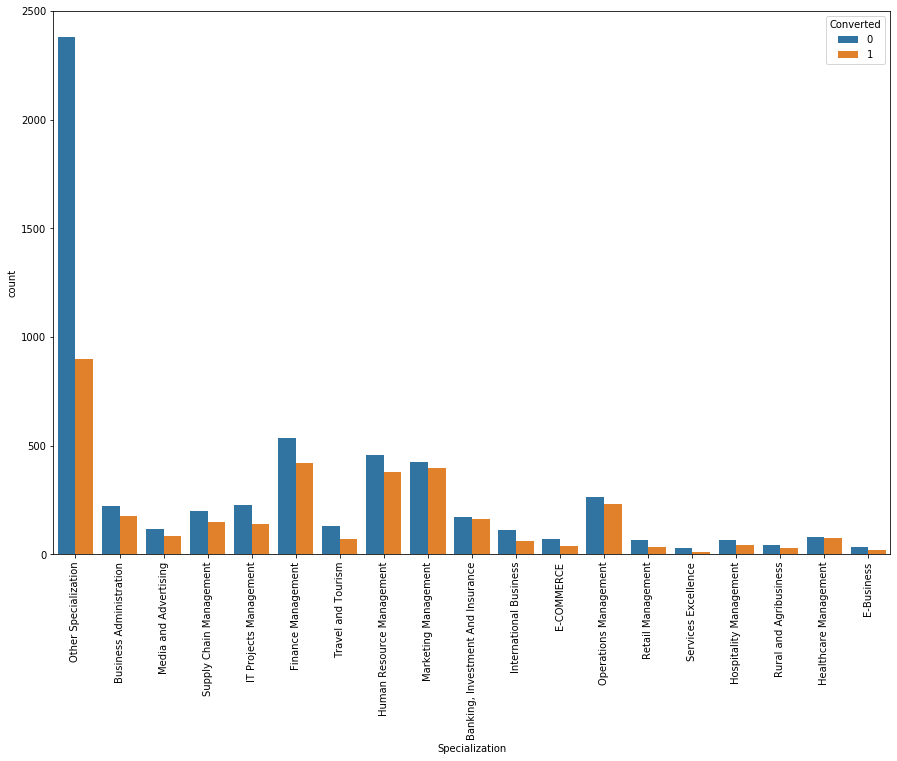

In [78]:
plt.figure(figsize=(15,10))
sns.countplot(x='Specialization',hue='Converted',data=lead)
plt.xticks(rotation=90)

#### What is your current occupation

In [79]:
lead['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

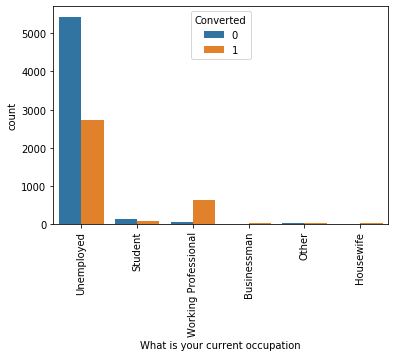

In [80]:
sns.countplot(x='What is your current occupation',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [81]:
lead['What is your current occupation']=lead['What is your current occupation'].replace('Other','Other Occupation')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

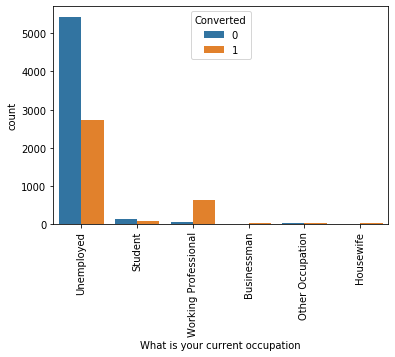

In [82]:
sns.countplot(x='What is your current occupation',hue='Converted',data=lead)
plt.xticks(rotation=90)

#### What matters most to you in choosing a course

In [83]:
lead['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

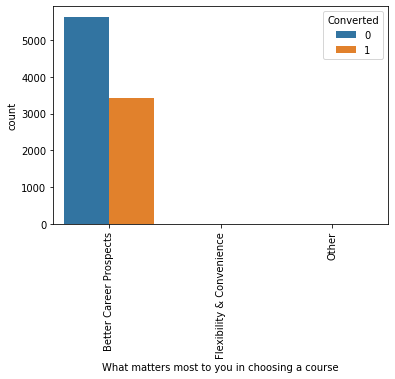

In [84]:
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=lead)
plt.xticks(rotation=90)

#### Search

In [85]:
lead['Search'].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

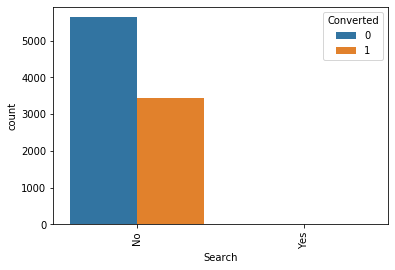

In [86]:
sns.countplot(x='Search',hue='Converted',data=lead)
plt.xticks(rotation=90)

#### Magazine

In [87]:
lead['Magazine'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

#### Newspaper Article

In [88]:
lead['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

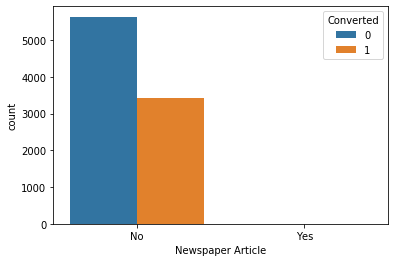

In [89]:
sns.countplot(x='Newspaper Article',hue='Converted',data=lead)

#### X Education Forums

In [90]:
lead['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

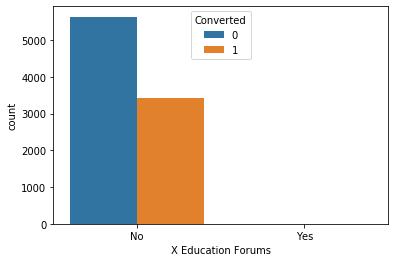

In [91]:
sns.countplot(x='X Education Forums',hue='Converted',data=lead)

#### Newspaper

In [92]:
lead['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

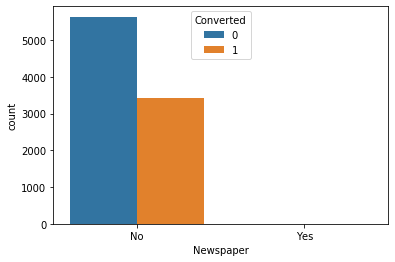

In [93]:
sns.countplot(x='Newspaper',hue='Converted',data=lead)

#### Digital Advertisement

In [94]:
lead['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

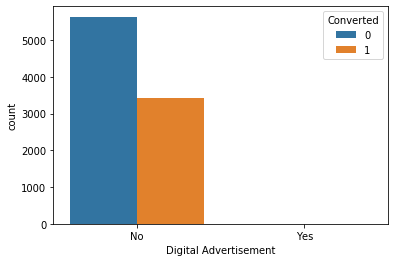

In [95]:
sns.countplot(x='Digital Advertisement',hue='Converted',data=lead)

#### Through Recommendations

In [96]:
lead['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

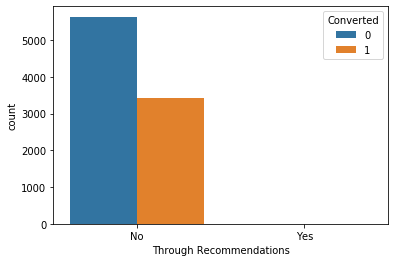

In [97]:
sns.countplot(x='Through Recommendations',hue='Converted',data=lead)

#### Receive more updates about oue courses

In [98]:
lead['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

#### Tags

In [99]:
lead['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

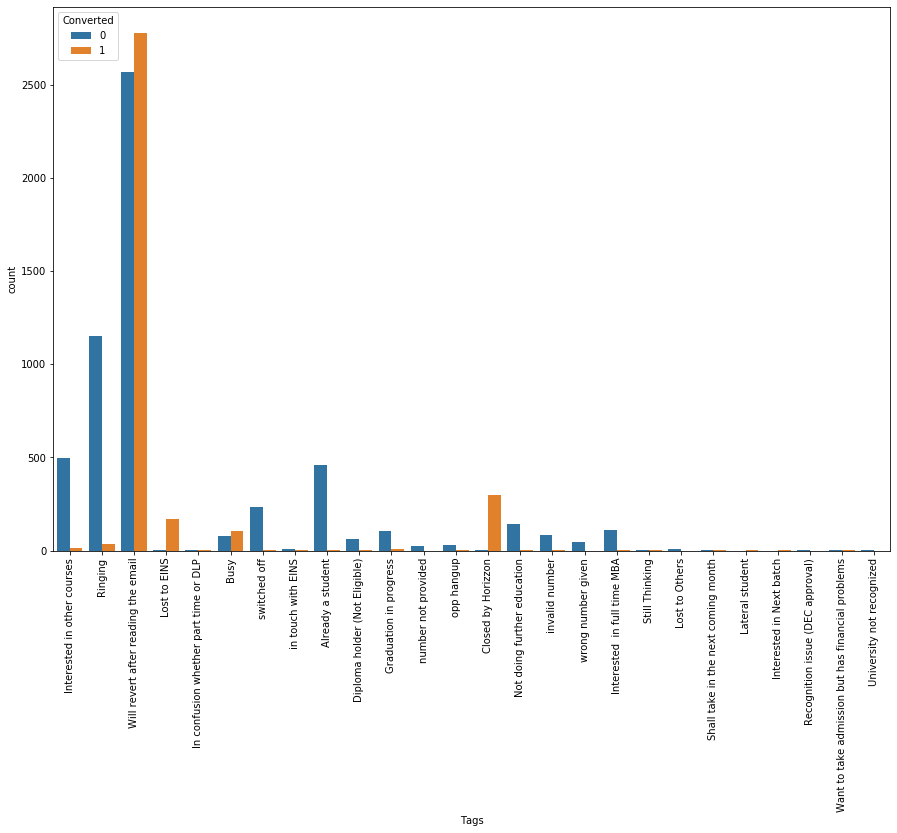

In [100]:
plt.figure(figsize=(15,10))
sns.countplot(x='Tags',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [101]:
lead['Tags']=lead['Tags'].replace(['In confusion whether part time or DLP','in touch with EINS','Diploma holder (Not Eligible)','Graduation in progress','number not provided','opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'],'Other Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

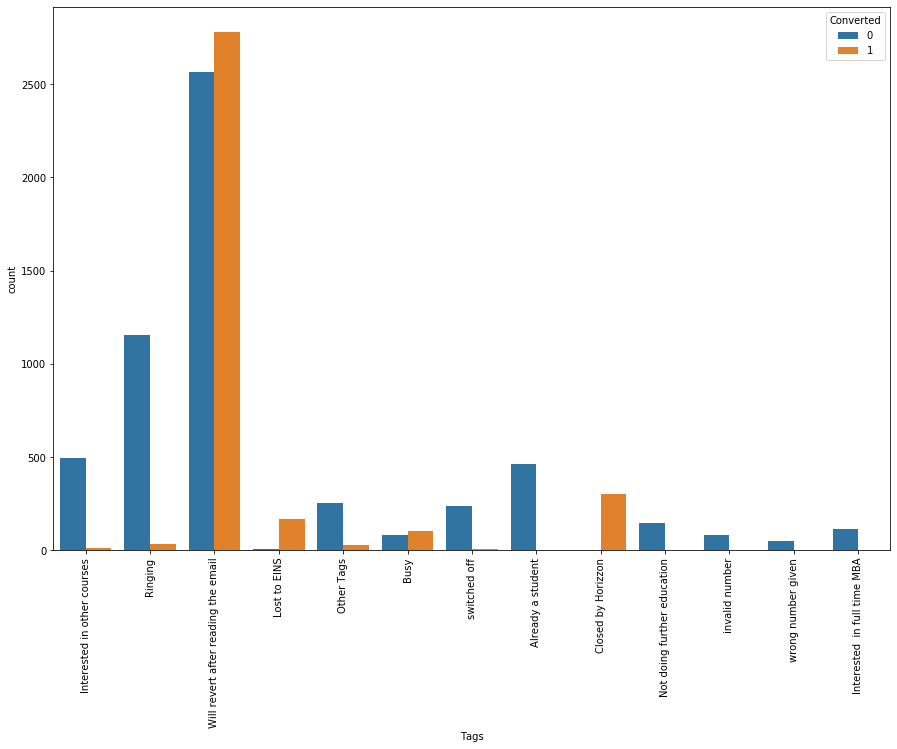

In [102]:
plt.figure(figsize=(15,10))
sns.countplot(x='Tags',hue='Converted',data=lead)
plt.xticks(rotation=90)

#### Lead Quality

In [103]:
lead['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

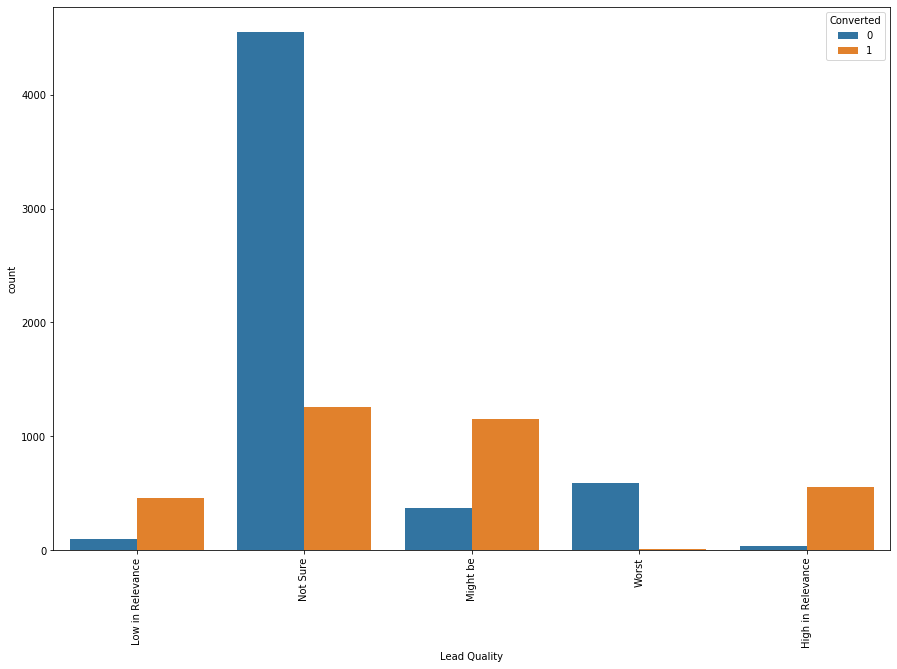

In [104]:
plt.figure(figsize=(15,10))
sns.countplot(x='Lead Quality',hue='Converted',data=lead)
plt.xticks(rotation=90)

#### Update me on supply chain content

In [105]:
lead['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

#### Get updates on DM content

In [106]:
lead['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

#### City

In [107]:
lead['City'].describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

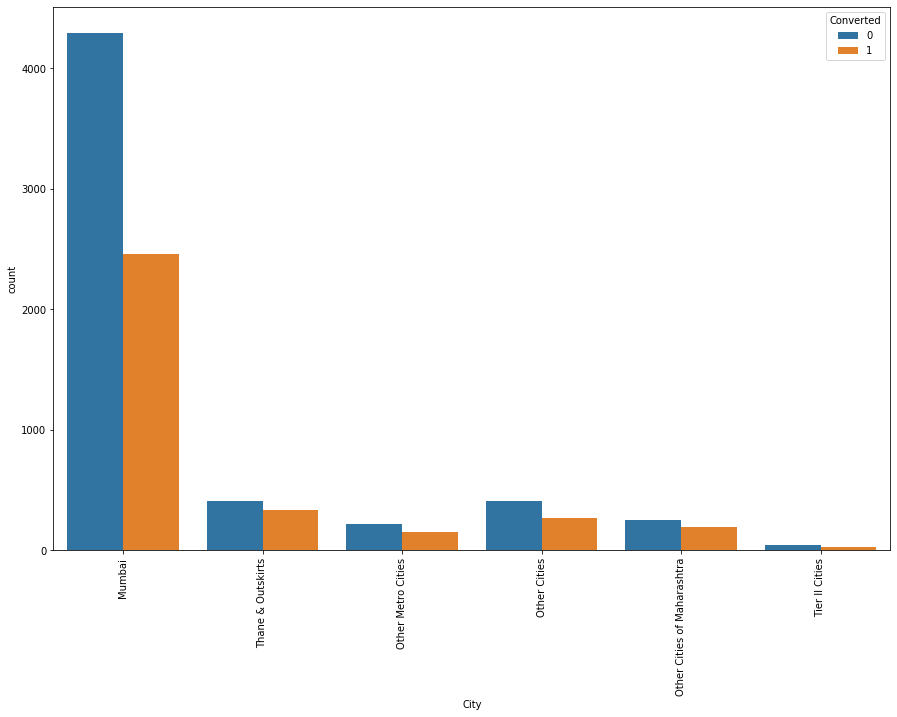

In [108]:
plt.figure(figsize=(15,10))
sns.countplot(x='City',hue='Converted',data=lead)
plt.xticks(rotation=90)

#### I agree to pay the amount through cheque

In [109]:
lead['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

#### A free copy of Mastering the interview

In [110]:
lead['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

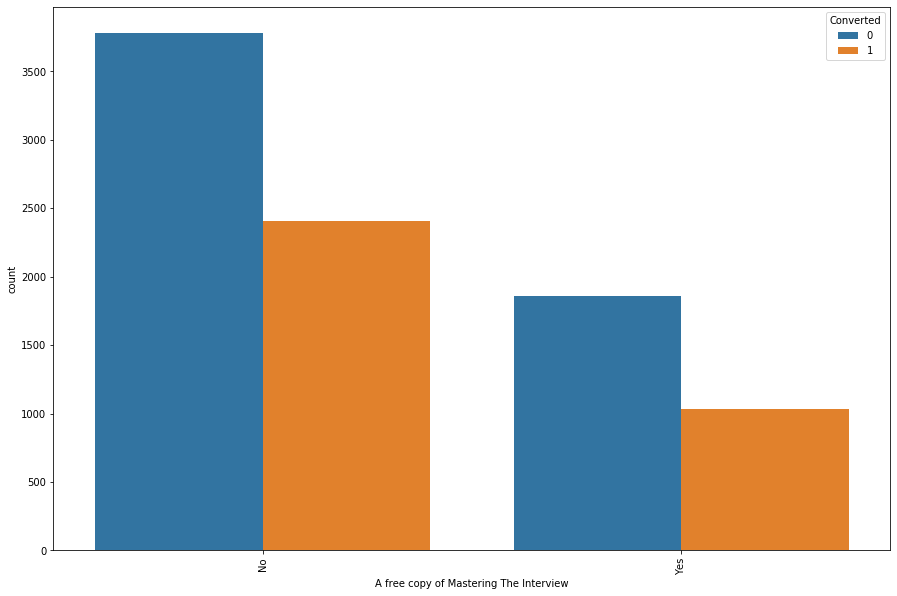

In [111]:
plt.figure(figsize=(15,10))
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=lead)
plt.xticks(rotation=90)

#### Last Notable Activity

In [112]:
lead['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

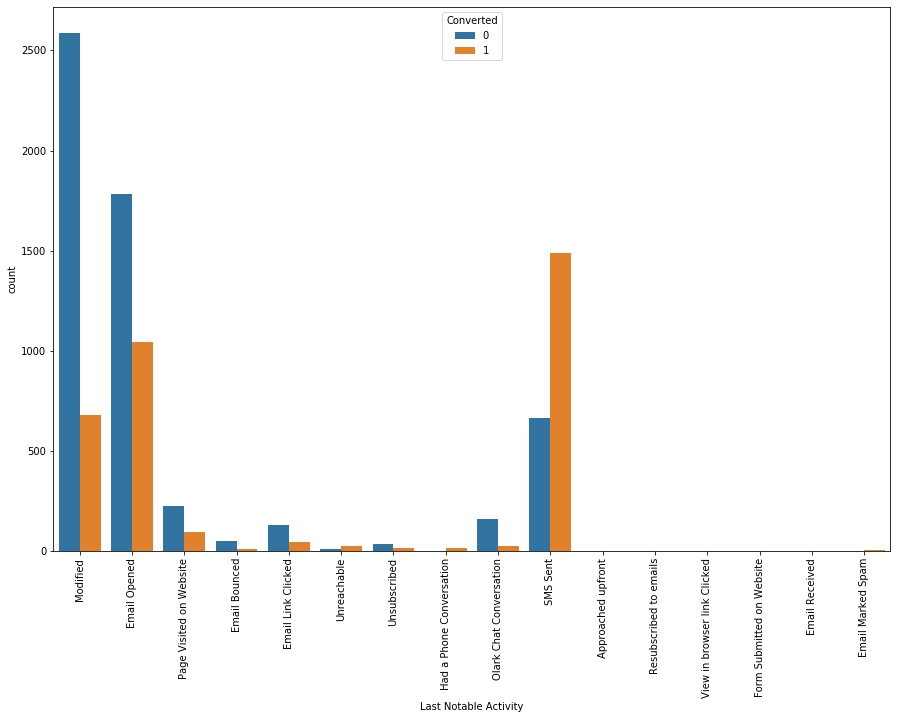

In [113]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Notable Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [114]:
lead['Last Notable Activity']=lead['Last Notable Activity'].replace(['Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received','Email Marked Spam'],'Other Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

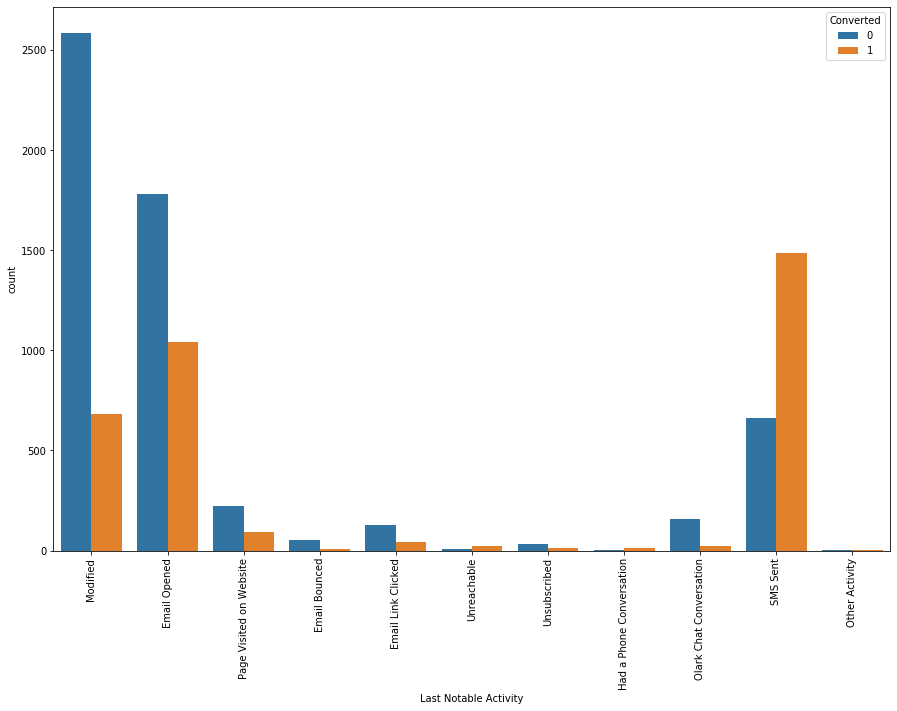

In [115]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Notable Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [116]:
lead=lead.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Country','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],1)

In [117]:
lead.shape

(9074, 16)

In [118]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


# Step4:Data Preparation

In [119]:
from sklearn import preprocessing

#Select all categorical variables
lead_categorical=lead.select_dtypes(include=['object'])
lead_categorical.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [120]:
# Apply Label Encoder to lead_categorical
le=preprocessing.LabelEncoder()
lead_categorical=lead_categorical.apply(le.fit_transform)
lead_categorical.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,4332,0,4,0,0,7,13,4,4,1,0,4
1,1527,0,5,0,0,3,13,4,8,3,0,2
2,5034,1,1,0,0,3,1,3,9,2,0,2
3,462,1,1,0,0,9,11,4,8,3,0,4
4,1842,1,3,0,0,0,13,4,9,2,0,4


In [121]:
lead=lead.drop(lead_categorical.columns,axis=1)
lead=pd.concat([lead,lead_categorical],axis=1)
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,0,0.0,0,0.0,4332,0,4,0,0,7,13,4,4,1,0,4
1,0,5.0,674,2.5,1527,0,5,0,0,3,13,4,8,3,0,2
2,1,2.0,1532,2.0,5034,1,1,0,0,3,1,3,9,2,0,2
3,0,1.0,305,1.0,462,1,1,0,0,9,11,4,8,3,0,4
4,1,2.0,1428,1.0,1842,1,3,0,0,0,13,4,9,2,0,4


In [122]:
lead=lead.drop('Prospect ID',axis=1)
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,0,0.0,0,0.0,0,4,0,0,7,13,4,4,1,0,4
1,0,5.0,674,2.5,0,5,0,0,3,13,4,8,3,0,2
2,1,2.0,1532,2.0,1,1,0,0,3,1,3,9,2,0,2
3,0,1.0,305,1.0,1,1,0,0,9,11,4,8,3,0,4
4,1,2.0,1428,1.0,1,3,0,0,0,13,4,9,2,0,4


In [123]:
lead.shape

(9074, 15)

In [124]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
Converted                          9074 non-null int64
TotalVisits                        9074 non-null float64
Total Time Spent on Website        9074 non-null int64
Page Views Per Visit               9074 non-null float64
Lead Origin                        9074 non-null int32
Lead Source                        9074 non-null int32
Do Not Email                       9074 non-null int32
Do Not Call                        9074 non-null int32
Last Activity                      9074 non-null int32
Specialization                     9074 non-null int32
What is your current occupation    9074 non-null int32
Tags                               9074 non-null int32
Lead Quality                       9074 non-null int32
City                               9074 non-null int32
Last Notable Activity              9074 non-null int32
dtypes: float64(2), int32(11), int64(2)
memory usage: 1000.4 KB


In [125]:
# Convert target variable Converted to categorical
lead['Converted']=lead['Converted'].astype('category')

# Step5:Model Building and Evaluation

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X=lead.drop('Converted',axis=1)
y=lead['Converted']

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Default Hyperparameters

In [129]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [130]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
predictions=rfc.predict(X_test)

In [132]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [133]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1734
           1       0.89      0.82      0.85       989

    accuracy                           0.90      2723
   macro avg       0.90      0.88      0.89      2723
weighted avg       0.90      0.90      0.90      2723



In [134]:
print(confusion_matrix(y_test,predictions))

[[1635   99]
 [ 181  808]]


In [135]:
print(accuracy_score(y_test,predictions))

0.897172236503856


## Hyperparameter Tuning

###  Tuning max_depth

In [136]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds=5
parameters={'max_depth':range(2,20,5)}
rf=RandomForestClassifier()
rf=GridSearchCV(rf,parameters,cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [137]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.036289,0.011945,0.007850,0.006989,2,{'max_depth': 2},0.857592,0.833858,0.820472,0.836220,...,0.843017,0.016867,4,0.868701,0.835269,0.804369,0.818933,0.862429,0.837940,0.024663
1,0.046871,0.009881,0.012500,0.006250,7,{'max_depth': 7},0.892211,0.898425,0.893701,0.905512,...,0.897024,0.004717,3,0.913386,0.905924,0.908876,0.907695,0.911435,0.909463,0.002656
2,0.065621,0.006249,0.003125,0.006250,12,{'max_depth': 12},0.909520,0.910236,0.896850,0.913386,...,0.906786,0.005827,2,0.955315,0.949616,0.951978,0.956505,0.956308,0.953944,0.002706
3,0.078689,0.014060,0.003125,0.006250,17,{'max_depth': 17},0.915028,0.909449,0.906299,0.907087,...,0.909935,0.003195,1,0.976378,0.976776,0.977760,0.979335,0.977760,0.977602,0.001023


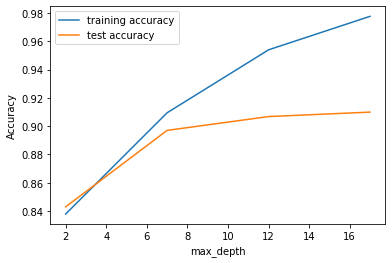

In [138]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we see that if we increase the max_depth value the model becomes overfitting. So we can select the max_depth below 8.

### Tuning n_estimators

In [139]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds=5
parameters={"n_estimators":range(100,1500,400)}
rf=RandomForestClassifier(max_depth=5)
rf=GridSearchCV(rf,parameters,cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [140]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.353490,0.014688,0.028123,0.006249,100,{'n_estimators': 100},0.885130,0.887402,0.892913,0.898425,...,0.892300,0.005326,4,0.902362,0.894903,0.899823,0.894509,0.893919,0.897103,0.003370
1,1.702403,0.021720,0.131240,0.007654,500,{'n_estimators': 500},0.887490,0.890551,0.890551,0.898425,...,0.892773,0.004156,2,0.900787,0.898248,0.898839,0.895887,0.894903,0.897733,0.002109
2,3.259225,0.258711,0.247997,0.012209,900,{'n_estimators': 900},0.884343,0.889764,0.888976,0.903150,...,0.892615,0.006614,3,0.900394,0.896674,0.896280,0.897264,0.896674,0.897457,0.001502
3,4.687799,0.236687,0.340899,0.011786,1300,{'n_estimators': 1300},0.882769,0.891339,0.893701,0.900787,...,0.893245,0.006161,1,0.899213,0.900216,0.898839,0.896871,0.897264,0.898481,0.001245


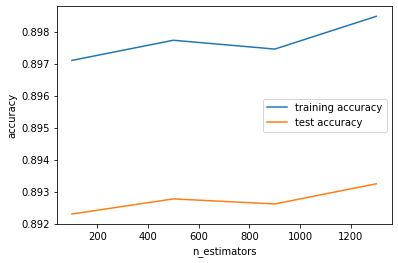

In [141]:
plt.figure()
plt.plot(scores['param_n_estimators'],scores['mean_train_score'],label="training accuracy")
plt.plot(scores['param_n_estimators'],scores['mean_test_score'],label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()
plt.show()


We can see that the n_estimators increases beyond 500 the testing score decreases.

### Tuning max_features

In [142]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds=5
parameters={"max_features":[4,8,12,14]}
rf=RandomForestClassifier(max_depth=5)
rf=GridSearchCV(rf,parameters,cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [143]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053147,0.006418,0.003999,0.003577,4,{'max_features': 4},0.885917,0.899213,0.891339,0.900787,...,0.894820,0.005486,4,0.900787,0.897461,0.897264,0.899429,0.899626,0.898914,0.001350
1,0.062497,0.000006,0.009375,0.007655,8,{'max_features': 8},0.891424,0.907874,0.912598,0.908661,...,0.905054,0.007265,1,0.909843,0.908483,0.913600,0.909073,0.910057,0.910211,0.001785
2,0.083452,0.008566,0.006251,0.007655,12,{'max_features': 12},0.892211,0.906299,0.895276,0.908661,...,0.900960,0.006304,3,0.910630,0.907892,0.907105,0.910844,0.906711,0.908637,0.001758
3,0.094078,0.010423,0.012501,0.006250,14,{'max_features': 14},0.896145,0.914173,0.898425,0.903150,...,0.904425,0.006856,2,0.910039,0.915765,0.904153,0.903562,0.911041,0.908912,0.004561


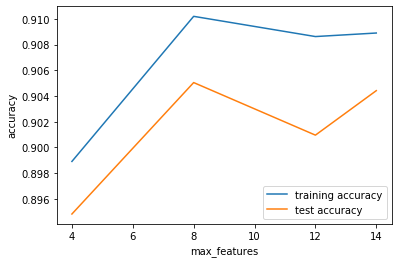

In [144]:
plt.figure()
plt.plot(scores['param_max_features'],scores['mean_train_score'],label="training accuracy")
plt.plot(scores['param_max_features'],scores['mean_test_score'],label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("accuracy")
plt.legend()
plt.show()

 We can see that the max_features is low the training and testing accuracy is good.

### Tuning min_samples_leaf

In [145]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds=5
parameters={"min_samples_leaf":range(100,400,50)}
rf=RandomForestClassifier()
rf=GridSearchCV(rf,parameters,cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [146]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043917,6.883671e-03,0.004727,0.005736,100,{'min_samples_leaf': 100},0.865460,0.863780,0.865354,0.878740,...,0.866005,0.007135,1,0.876969,0.873844,0.863413,0.880732,0.858099,0.870611,0.008505
1,0.034372,6.248999e-03,0.006250,0.007654,150,{'min_samples_leaf': 150},0.837923,0.859843,0.851969,0.865354,...,0.854826,0.009465,2,0.848031,0.861641,0.848061,0.856131,0.861051,0.854983,0.005978
2,0.034373,6.248832e-03,0.006250,0.007655,200,{'min_samples_leaf': 200},0.854445,0.840157,0.844882,0.862205,...,0.851362,0.007857,3,0.859449,0.844912,0.862232,0.852391,0.852391,0.854275,0.006080
3,0.031247,6.468134e-07,0.003125,0.006249,250,{'min_samples_leaf': 250},0.833989,0.838583,0.832283,0.870866,...,0.843174,0.014142,4,0.839764,0.838614,0.830152,0.861838,0.848061,0.843686,0.010705
4,0.040717,7.380132e-03,0.007124,0.005772,300,{'min_samples_leaf': 300},0.797010,0.802362,0.826772,0.838583,...,0.822390,0.019721,6,0.803346,0.805353,0.827790,0.839795,0.839992,0.823255,0.016069


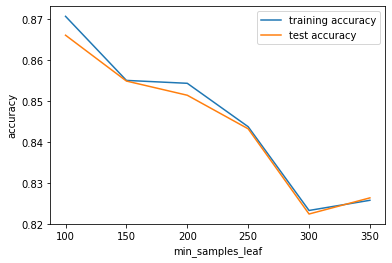

In [147]:
plt.figure()
plt.plot(scores['param_min_samples_leaf'],scores['mean_train_score'],label="training accuracy")
plt.plot(scores['param_min_samples_leaf'],scores['mean_test_score'],label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()

We can see that at low values of min_samples_leaf the training and testing score is good.

### Tuning min_samples_split

In [148]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds=5
parameters={"min_samples_split":range(100,500,50)}
rf=RandomForestClassifier()
rf=GridSearchCV(rf,parameters,cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [149]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057536,0.012394,0.008206,0.004978,100,{'min_samples_split': 100},0.892998,0.910236,0.895276,0.903150,...,0.899543,0.006333,1,0.912598,0.909860,0.901004,0.913009,0.903956,0.908086,0.004795
1,0.046876,0.009889,0.006250,0.007655,150,{'min_samples_split': 150},0.874115,0.894488,0.896063,0.892126,...,0.889781,0.007977,2,0.890945,0.894509,0.898052,0.900216,0.896083,0.895961,0.003155
2,0.046867,0.000008,0.006250,0.007655,200,{'min_samples_split': 200},0.876475,0.881102,0.888976,0.889764,...,0.883798,0.004991,4,0.891732,0.883291,0.895493,0.886046,0.887621,0.888837,0.004306
3,0.047326,0.000901,0.000800,0.001600,250,{'min_samples_split': 250},0.886703,0.886614,0.876378,0.892126,...,0.884900,0.005214,3,0.898819,0.890376,0.877977,0.887030,0.887621,0.888364,0.006687
4,0.040957,0.007952,0.009376,0.007655,300,{'min_samples_split': 300},0.873328,0.878740,0.878740,0.890551,...,0.878444,0.006787,5,0.889764,0.882307,0.882700,0.884668,0.873647,0.882617,0.005212


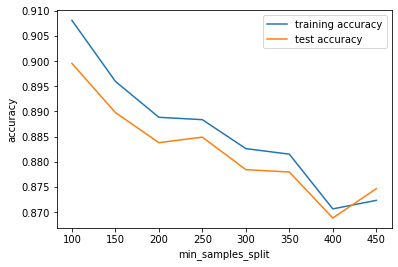

In [150]:
plt.figure()
plt.plot(scores['param_min_samples_split'],scores['mean_train_score'],label="training accuracy")
plt.plot(scores['param_min_samples_split'],scores['mean_test_score'],label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [151]:
We can see that the min_samples_split is increases the training and testing accuracy is good.

SyntaxError: invalid syntax (<ipython-input-151-d1e3232a7eb8>, line 1)

### Grid Search to find Optimal Hyperparameters

In [152]:
param_grid={'max_depth':[3,6,9],'n_estimators':[200,300,500],'max_features':[5,10],'min_samples_split':[100,200,300],'min_samples_leaf':[100,200,300]}
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)

In [153]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  4.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [154]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8786017949929145 using {'max_depth': 6, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 200}


### Fitting the final model with the best parameters obtained from grid search.

In [155]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=100)

In [156]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
predictions = rfc.predict(X_test)

In [158]:
from sklearn.metrics import classification_report,confusion_matrix

In [159]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1734
           1       0.87      0.75      0.81       989

    accuracy                           0.87      2723
   macro avg       0.87      0.84      0.85      2723
weighted avg       0.87      0.87      0.87      2723



In [160]:
print(confusion_matrix(y_test,predictions))

[[1627  107]
 [ 249  740]]
